In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions. The pre-class assignment quiz must be **submitted on D2L on or before 11:59pm on on the day before class**. Students must come to class the next day prepared to discuss the material covered in this assignment.

---

# 06 Pre-Class Assignment: Matrix Mechanics

In this assignment, we will explore the mechanics of vectors and matrices.
These mechanics will be needed in future assignments. 
Make sure you understand and come to class with any questions. 

### Readings for this topic (Recommended in bold)
 * [Heffron Chapter 3.IV pg 224-240](http://joshua.smcvt.edu/linearalgebra/book.pdf)
 * [Beezer Chapter M pg 162-206 &  EM 340-345](http://linear.ups.edu/download/fcla-3.50-tablet.pdf)
 * [**_Boyd Section 6.2,-3, 10.1  pg 113-118, 177-183_**](http://vmls-book.stanford.edu/vmls.pdf)


### Goals for today's pre-class assignment 


1. [Dot Product Review](#Dot-Product-Review)
2. [Matrix Multiply](#Matrix-Multiply)
3. [Identity Matrix](#Identity-Matrix)
4. [Elementary Matrices](#Elementary-Matrices)
5. [Solving Many Systems (at the same time)](#Solving-Many-Systems-(at-the-same-time))





---
<a name=Dot-Product-Review></a>
## 1. Dot Product Review





We covered dot (inner) products a while ago.  This assignment will extend the idea of inner products to matrix multiplication. As a reminder, **_Sections 1.4_** of the [Stephen Boyd and Lieven Vandenberghe Applied Linear algebra book](http://vmls-book.stanford.edu/) covers the dot product.  Here is a quick review:

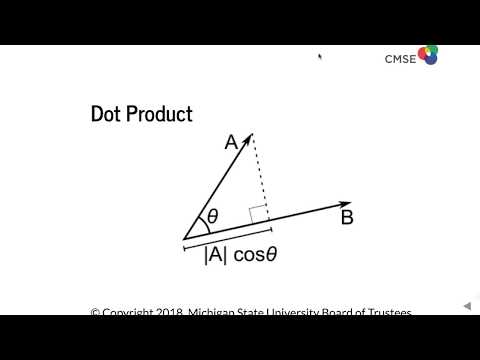

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ZZjWqxKqJwQ",width=640,height=360, cc_load_policy=True)

Given two vectors $u$ and $v$ in $R^n$ (i.e. they have the same length), the "dot" product operation multiplies all of the corresponding elements  and then adds them together.

$$u = [u_1, u_2, \dots, u_n]$$
$$v = [v_1, v_2, \dots, v_n]$$

$$u \cdot v = u_1 v_1 + u_2  v_2 + \dots + u_nv_n$$

or:

$$ u \cdot v = \sum^n_{i=1} u_i v_i$$

This can easily be written as python code as follows:

In [2]:
u = [1,2,3]
v = [3,2,1]
solution = 0
for i in range(len(u)):
    solution += u[i]*v[i]
    
solution

10

In ```numpy``` the dot product between two vectors can be calculated using the following built in function:

In [3]:
import numpy as np
np.dot([1,2,3], [3,2,1])

10

&#9989;**<font color=red>QUESTION</font>**: What is the dot product of any n-vector and the zero n-vector? 

**Zero because any number multiplied by zero is zero.**

&#9989;**<font color=red>QUESTION</font>**: What happens to the ```numpy.dot``` function if the two input vectors are not the same size?  

**It would give an error.**



---
<a name=Matrix-Multiply></a>
## 2. Matrix Multiply





Read **_Section 10.1_** of the [Stephen Boyd and Lieven Vandenberghe Applied Linear algebra book](http://vmls-book.stanford.edu/) which covers Matrix Multiplication.  Here is a quick review:

Two matrices $A$ and $B$ can be multiplied together if and only if their "inner dimensions" are the same, i.e. $A$ is $n\times d$ and $B$ is $d\times m$ (note that the columns of $A$ and the rows of $B$ are both $d$). 
Multiplication of these two matrices results in a third matrix $C$ with the dimension of $n\times m$.
Note that $C$ has the same first dimension as $A$ and the same second dimension as $B$. i.e $n\times m$.  

_**The $(i,j)$ element in $C$ is the dot product of the $i$th row of $A$ and the $j$th column of $B$.**_

The $i$th row of $A$ is:

$$ [ a_{i1},  a_{i2},  \dots , a_{id} ],$$

and the $j$th column of $B$ is:

$$
\left[
\begin{matrix}
    b_{1j}\\ 
    b_{2j}\\
    \vdots \\
    b_{dj}
\end{matrix}
\right] 
$$

So, the dot product of these two vectors is:

$$c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + \dots + a_{id}b_{dj}$$

Consider the simple $2\times 2$ example below:


$$ 
\left[
\begin{matrix}
    a & b\\ 
    c & d   
\end{matrix}
\right] 
\left[
\begin{matrix}
    w & x\\ 
    y & z   
\end{matrix}
\right] 
=
\left[
\begin{matrix}
    aw+by & ax+bz\\ 
    cw + dy & cx + dz   
\end{matrix}
\right] 
$$

Let's do an example using ```numpy``` and show the results using ```sympy```:

In [4]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

In [5]:
A = np.matrix([[1,1], [2,2]])
sym.Matrix(A)

⎡1  1⎤
⎢    ⎥
⎣2  2⎦

In [6]:
B = np.matrix([[3,4], [3,4]])
sym.Matrix(B)

⎡3  4⎤
⎢    ⎥
⎣3  4⎦

In [7]:
sym.Matrix(A*B)

⎡6   8 ⎤
⎢      ⎥
⎣12  16⎦

&#9989;**<font color=red>DO THIS</font>**: Given two matrices; $A$ and $B$, show that order matters when doing a matrix multiply. That is, in general, $AB \neq BA$. 
Show this with an example using two $3\times 3$ matrices and ```numpy```.

In [8]:
# Put your code here.
A = np.matrix([[1,2,3],[7,8,9],[5,6,5]])
sym.Matrix(A)
B = np.matrix([[1,5,6],[7,5,6],[8,7,4]])
sym.Matrix(B)
AB = sym.Matrix(A*B)
BA = sym.Matrix(B*A)
AB == BA

False

Now consider the following set of linear equations:

$$ 3x_1-3x_2+9x_3 =~24$$
$$ 2x_1-2x_2+7x_3 =~17$$
$$ -x_1+2x_2-4x_3 = -11$$

We typically write this in the following form:

$$ 
\left[
\begin{matrix}
    3 & -3 & 9\\ 
    2 & -2 & 7 \\
    -1 & 2 & -4
\end{matrix}
\right] 
\left[
\begin{matrix}
    x_1 \\ 
    x_2 \\
    x_3
\end{matrix}
\right] 
=
\left[
\begin{matrix}
    24\\ 
    17 \\
    -11
\end{matrix}
\right] 
$$

Notice how doing the matrix multiplication results back into the original system of equations. If we rename the three matrices from above to $A$, $x$, and $b$ (note $x$ and $b$ are lowercase because they are column vectors) then we get the main equation for this class, which is:

$$Ax=b$$

Note the information about the equation doesn't change when you change formats.  For example, the equation format, the augmented format and the $Ax=b$ format contain the same information.   However, we use the different formats for different applications.  Consider the ```numpy.linalg.solve``` function which assumes the format $Ax=b$

In [9]:
A = np.matrix([[3, -3,9], [2, -2, 7], [-1, 2, -4]])
sym.Matrix(A)

⎡3   -3  9 ⎤
⎢          ⎥
⎢2   -2  7 ⎥
⎢          ⎥
⎣-1  2   -4⎦

In [10]:
b = np.matrix([[24], [17], [-11]])
sym.Matrix(b)

⎡24 ⎤
⎢   ⎥
⎢17 ⎥
⎢   ⎥
⎣-11⎦

In [11]:
#Calculate answer to x using numpy
x = np.linalg.solve(A,b)
sym.Matrix(x)

⎡3.0 ⎤
⎢    ⎥
⎢-2.0⎥
⎢    ⎥
⎣1.0 ⎦

&#9989;**<font color=red>QUESTION</font>**: What is the size of the matrix resulting from multiplying a $10 \times 40$ matrix with a $40 \times 3$ matrix?

**It would be $10 \times 3$**


---
<a name=Identity-Matrix></a>
## 3. Identity Matrix



 

Read sections **_Sections 6.2 and 6.3_** of the [Stephen Boyd and Lieven Vandenberghe Applied Linear algebra book](http://vmls-book.stanford.edu/) covers more about matrixes.  

An identity matrix is a special square matrix (i.e. $n=m$) that has ones in the diagonal and zeros other places. For example the following is the $3\times 3$ identity matrix:

$$
I_3 = 
\left[
\begin{matrix}
    1 & 0 & 0\\ 
    0 & 1 & 0 \\
    0 & 0 & 1
\end{matrix}
\right] 
$$

We always denote the identity matrix with a capital $I$. Often a subscript is used to denote the value of $n$. The notations $I_{nxn}$ and $I_n$ are both acceptable.

An identity matrix is similar to the number 1 for scalar values.  I.e. multiplying a square matrix $A_{nxn}$ by its corresponding identity matrix $I_{nxn}$ (either on the left or on the right) results in itself $A_{nxn}$.

&#9989;**<font color=red>DO THIS</font>**: Pick a random $3\times 3$ matrix (you can define it using ``np.matrix(np.random.random([3,3]))``), $A$, and multiply it by the $3\times 3$ Identity matrix (once on the left and once on the right) and show you get $A$ in either case, i.e. demonstrate that $A I_3 =A$ and $I_3 A=A$. 

In [12]:
#Put your code here
A = np.matrix(np.random.random([3,3]))
A = sym.Matrix(A)
I = np.matrix([[1,0,0], [0,1,0],[0,0,1]])
I = sym.Matrix(I)
IA = sym.Matrix(I*A)
AI = sym.Matrix(A*I)
AI == IA

True

&#9989; **<font color=red>QUESTION:</font>** Consider two square matrices $A$ and $B$ of size $n \times n$.  $AB = BA$ is **NOT** true for many $A$ and $B$.  Describe an example (different from the one above) where $AB = BA$ is true. Explain why the equality works for your example.

**Put your answer here.**


---
<a name=Elementary-Matrices></a>
## 4. Elementary Matrices


**_NOTE_**: A detailed description of elementary matrices can be found here in the **_Beezer text Subsection EM 340-345_** if you find the following confusing. 

There exist a cool set of matrices that can be used to implement Elementary Row Operations. Recall our elementary row operations include:

1. Swap two rows
2. Multiply a row by a constant ($c$)
3. Multiply a row by a constant ($c$) and add it to another row.

You can create these elementary matrices by applying the desired elementary row operations to the identity matrix. 

If you multiply your matrix from the left using the elementary matrix, you will get the desired operation.

For example, here is the elementary row operation to swap the first and second rows of a $3\times 3$ matrix:

$$ 
E_{12}=
\left[
\begin{matrix}
    0 & 1 & 0\\ 
    1 & 0 & 0 \\
    0 & 0 & 1
\end{matrix}
\right] 
$$


In [13]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)
A = np.matrix([[3, -3,9], [2, -2, 7], [-1, 2, -4]])
sym.Matrix(A)

⎡3   -3  9 ⎤
⎢          ⎥
⎢2   -2  7 ⎥
⎢          ⎥
⎣-1  2   -4⎦

In [14]:
E1 = np.matrix([[0,1,0], [1,0,0], [0,0,1]])
sym.Matrix(E1)

⎡0  1  0⎤
⎢       ⎥
⎢1  0  0⎥
⎢       ⎥
⎣0  0  1⎦

In [17]:
A1 = E1*A
sym.Matrix(A1)

⎡2   -2  7 ⎤
⎢          ⎥
⎢3   -3  9 ⎥
⎢          ⎥
⎣-1  2   -4⎦

&#9989;  **<font color=red>DO THIS</font>**: Give a $3\times 3$ elementary matrix named ```E2``` that swaps row 3 with row 1 and apply it to the $A$ Matrix. Replace the matrix $A$ with the new matrix.

In [19]:
# Put your answer here.  
# Feel free to swich this cell to markdown if you want to try writing your answer in latex.
E2 = np.matrix([[0,0,1],[0,1,0],[1,0,0]])
A = E2*A1
sym.Matrix(A)

⎡-1  2   -4⎤
⎢          ⎥
⎢3   -3  9 ⎥
⎢          ⎥
⎣2   -2  7 ⎦

In [11]:
from answercheck import checkanswer

checkanswer.matrix(E2,'2c2d2e407389eabeb6d90894565c830f');


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Answer seems to be correct



&#9989;  **<font color=red>DO THIS</font>**: Give a $3\times 3$ elementary matrix named ```E3``` that multiplies the first row by $c=3$ and adds it to the third row. Apply the elementary matrix to the $A$ matrix. Replace the matrix $A$ with the new matrix.

In [ ]:
# Put your answer here.  
# Feel free to swich this cell to markdown if you want to try writing your answer in latex.

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(E3,'55ae1f9eb21df00c59dad623b9471506');


&#9989;  **<font color=red>DO THIS</font>**: Give a $3\times 3$ elementary matrix named ```E4``` that multiplies the second row by a constant $c=1/2$ applies this to matrix $A$.

In [ ]:
# Put your answer here.  
# Feel free to swich this cell to markdown if you want to try writing your answer in latex.

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(E4,'3a5256840ef907a1b73ebba4471ac26d');


If the above are correct then we can combine the three operators on the original matrix $A$ as follows. 

In [ ]:
A = np.matrix([[3, -3,9], [2, -2, 7], [-1, 2, -4]])

sym.Matrix(E4*E3*E2*A)

---
<a name=Solving-Many-Systems-(at-the-same-time)></a>
## 5. Solving Many Systems (at the same time)




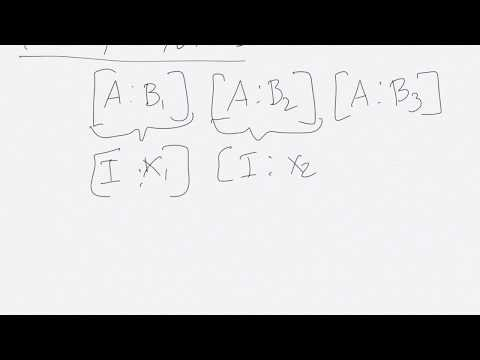

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("k5fdGS5b4OU",width=640,height=360, cc_load_policy=True)

Consider the Giselle example from before.  Her earnings do not change (i.e. she makes $\$20$ per hour as a carpenter and $\$25$ per hour as a blacksmith). However, now she has worked two more weeks. In the second week, she worked for a total of 35 hours and earned $\$750$. In the third week, she worked for a total of 30 hours and earned $\$650$. How much did she work as a carpenter and blacksmith for each of those weeks? In other words:
 
**Week 1:**
$$ c + b = 30 $$
$$ 20c + 25b = 690 $$

**Week 2:**
$$ c + b = 35 $$
$$ 20c + 25b = 750 $$

**Week 3:**
$$ c + b = 30 $$
$$ 20c + 25b = 650 $$

&#9989;**<font color=red>DO THIS</font>**: Write a $2 \times 5$ augmented matrix representing the 6 equations above.  Name your Matrix $G$ to verify your answer using the ```checkanswer``` function below.

In [4]:
#Put your answer to the above quation here
import numpy as np
import sympy as sym
G = np.matrix([[1,1,30,35,30],[20,25,690,750,650]])
RREF = sym.Matrix(G).rref()[0]
RREF

Matrix([
[1, 0, 12, 25, 20],
[0, 1, 18, 10, 10]])

In [41]:
from answercheck import checkanswer

checkanswer.matrix(G,'a1e01de142199370be70131849fbf108');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[  1.   1.  30.  35.  30.]
 [ 20.  25. 690. 750. 650.]]
Answer seems to be correct



----


Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.


---------
### Congratulations, we're done!